In [4]:
# Study case: clustering customers berdasarkan dua fitur sederhana
# Langkah 1 (dasar clustering): kita definisikan masalah, lihat data, hitung jarak (Euclidean),
# dan perhatikan efek skala (raw vs standardize).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = {
    "Customer": ["C1","C2","C3","C4","C5","C6","C7","C8"],
    "visits_per_month": [2, 3, 2, 10, 11, 10, 5, 6],
    "avg_spend": [100, 150, 120, 1000, 950, 1100, 400, 420]  # misal: ribuan rupiah
}
df = pd.DataFrame(data)
df

,Customer,visits_per_month,avg_spend
0,C1,2,100
1,C2,3,150
2,C3,2,120
3,C4,10,1000
4,C5,11,950
5,C6,10,1100
6,C7,5,400
7,C8,6,420


In [6]:
# Fungsi buat matriks jarak Euclidean antar baris
def euclidean_distance_matrix(X):
    X = np.asarray(X, dtype=float)
    diff = X[:, None, :] - X[None, :, :]   # broadcasting
    dists = np.sqrt((diff ** 2).sum(axis=2))
    return dists

In [7]:
# Matriks jarak (raw)
X_raw = df[["visits_per_month", "avg_spend"]].values
dist_raw = euclidean_distance_matrix(X_raw)
dist_raw_df = pd.DataFrame(dist_raw, index=df["Customer"], columns=df["Customer"])

In [8]:
# Standarisasi fitur (z-score) -> untuk tunjukin efek skala
means = X_raw.mean(axis=0)
stds = X_raw.std(axis=0, ddof=0)
X_std = (X_raw - means) / stds
dist_std = euclidean_distance_matrix(X_std)
dist_std_df = pd.DataFrame(dist_std, index=df["Customer"], columns=df["Customer"])

In [9]:
# Tampilkan tabel & matriks ke user (jika ace_tools tersedia, pakai display interaktif)
try:
    import ace_tools as tools
    tools.display_dataframe_to_user("Study case data (customers)", df)
    tools.display_dataframe_to_user("Distance matrix (raw features)", dist_raw_df)
    tools.display_dataframe_to_user("Distance matrix (standardized features)", dist_std_df)
except Exception:
    print("\nDATA:")
    print(df.to_string(index=False))
    print("\nDISTANCE MATRIX (raw):")
    print(dist_raw_df.round(2))
    print("\nDISTANCE MATRIX (standardized):")
    print(dist_std_df.round(2))


DATA:
Customer  visits_per_month  avg_spend
      C1                 2        100
      C2                 3        150
      C3                 2        120
      C4                10       1000
      C5                11        950
      C6                10       1100
      C7                 5        400
      C8                 6        420

DISTANCE MATRIX (raw):
Customer       C1      C2      C3      C4      C5       C6      C7      C8
Customer                                                                  
C1           0.00   50.01   20.00  900.04  850.05  1000.03  300.01  320.02
C2          50.01    0.00   30.02  850.03  800.04   950.03  250.01  270.02
C3          20.00   30.02    0.00  880.04  830.05   980.03  280.02  300.03
C4         900.04  850.03  880.04    0.00   50.01   100.00  600.02  580.01
C5         850.05  800.04  830.05   50.01    0.00   150.00  550.03  530.02
C6        1000.03  950.03  980.03  100.00  150.00     0.00  700.02  680.01
C7         300.01  250.01  

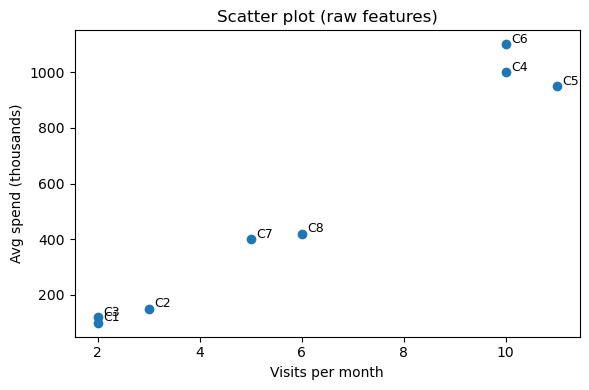

In [10]:
# Plot 1: scatter plot fitur raw
plt.figure(figsize=(6,4))
plt.scatter(df["visits_per_month"], df["avg_spend"])
for i, r in df.iterrows():
    plt.text(r["visits_per_month"] + 0.1, r["avg_spend"] + 5, r["Customer"], fontsize=9)
plt.xlabel("Visits per month")
plt.ylabel("Avg spend (thousands)")
plt.title("Scatter plot (raw features)")
plt.tight_layout()
plt.show()

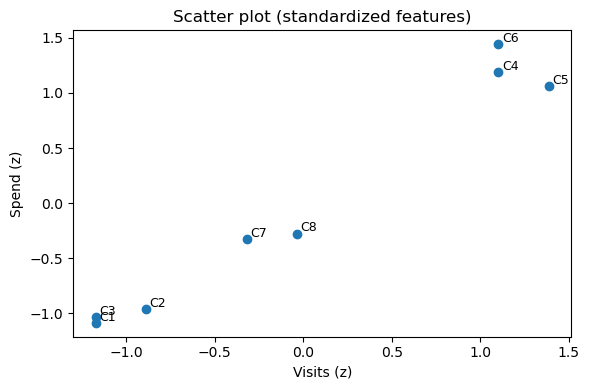

In [11]:
# Plot 2: scatter plot fitur ter-standarisasi (z-score)
plt.figure(figsize=(6,4))
plt.scatter(X_std[:,0], X_std[:,1])
for i, c in enumerate(df["Customer"]):
    plt.text(X_std[i,0] + 0.02, X_std[i,1] + 0.02, c, fontsize=9)
plt.xlabel("Visits (z)")
plt.ylabel("Spend (z)")
plt.title("Scatter plot (standardized features)")
plt.tight_layout()
plt.show()